In [ ]:
#### Packages ####
from pathlib import Path
from argparse import Namespace
from collections import Counter
import json
import os
import string
import time
import math
import numpy as np
import pandas as pd
from google_drive_downloader import GoogleDriveDownloader as gdd #just to open our file
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = [10, 10]
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#### Setting Direc
import os
os.chdir("/content/drive/My Drive/LMU-Statistik/SS22/WWC Hackathon for Social Good/wwcode-hackathon-2022/data")

In [75]:
# assign directory
directory = "climate-new-db-dataset/articles/"
# empty list for dataframes
dfs = []
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        #print(f)
        #print(filename.split(".")[0])
        this_df = pd.read_json(f, lines=True)
        this_df["source"] = filename.split(".")[0]
        dfs.append(this_df)

# Combine all dfs
df = pd.concat(dfs)

In [ ]:
# Export dataframe to csv
df.to_csv('climate-news-db-all.csv', encoding='utf-8')

In [80]:
# Convert "date_published" and "date_uploaded" to datetime format
df['date_published']= pd.to_datetime(df['date_published'])
df['date_uploaded']= pd.to_datetime(df['date_uploaded'])

In [81]:
# Overview of combined data
print(df.shape)
print(df.columns)
print(df.info())

(33362, 9)
Index(['id', 'body', 'headline', 'article_name', 'article_url',
       'date_published', 'article_length', 'date_uploaded', 'source'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33362 entries, 0 to 3618
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              0 non-null      float64       
 1   body            33362 non-null  object        
 2   headline        33059 non-null  object        
 3   article_name    27674 non-null  object        
 4   article_url     33362 non-null  object        
 5   date_published  33072 non-null  datetime64[ns]
 6   article_length  33362 non-null  int64         
 7   date_uploaded   33362 non-null  datetime64[ns]
 8   source          33362 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 2.5+ MB
None


## Explore Dataset

In [84]:
# Date range of articles
print(df['date_published'].min())
print(df['date_published'].max())

1970-01-01 15:12:00
2022-06-25 14:44:24


In [91]:
# Number of articles per year
df['headline'].groupby(df['date_published'].dt.year).agg('count')

date_published
1970.0      23
1997.0       1
1998.0       1
1999.0       1
2000.0       1
2001.0      64
2002.0      17
2004.0       1
2005.0      95
2006.0      81
2007.0      77
2008.0      24
2009.0      50
2010.0     153
2011.0      63
2012.0     100
2013.0     127
2014.0     243
2015.0     888
2016.0     783
2017.0    1497
2018.0    2377
2019.0    7967
2020.0    8732
2021.0    7757
2022.0    1646
Name: headline, dtype: int64

In [94]:
# List all data sources
print(len(df['source'].unique()))
print(df['source'].unique())

16
['aljazeera' 'atlantic' 'bbc' 'cnn' 'nytimes' 'stuff' 'washington_post'
 'fox' 'newshub' 'economist' 'skyau' 'nzherald' 'guardian' 'dw'
 'dailymail' 'independent']


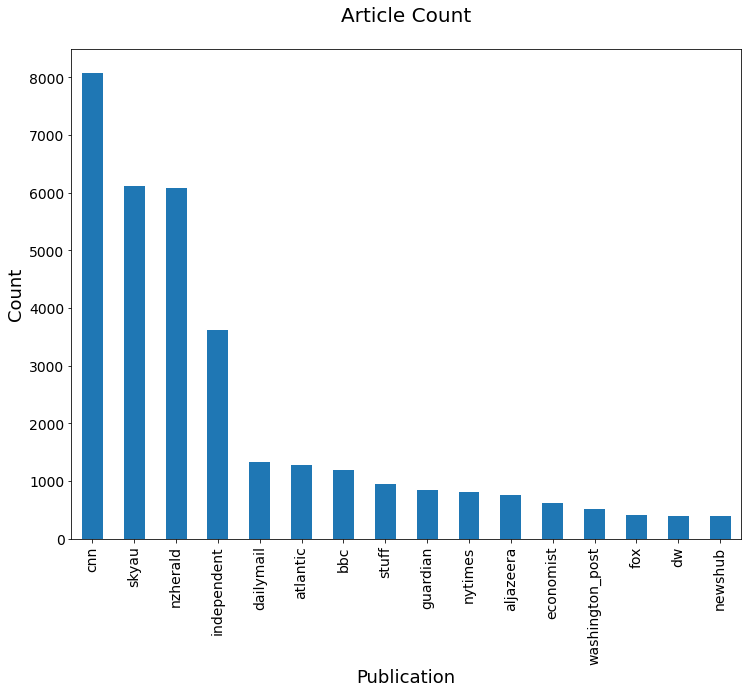

In [95]:
# Number of articles by Source
ax = df['source'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,9))
ax.set_title('Article Count\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);

In [96]:
df.duplicated().sum()

0